In [39]:
# Dataset source: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

In [20]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.base import BaseEstimator,TransformerMixin
import re
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

In [21]:
dataset = pd.read_csv("./Sleep_health_and_lifestyle_dataset.csv")

In [22]:
dataset.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [10]:
dataset = dataset.drop(["Person ID"], axis=1)

In [11]:
dataset["Sleep Disorder"].unique()

array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [12]:
dataset.isna().any()

Gender                     False
Age                        False
Occupation                 False
Sleep Duration             False
Quality of Sleep           False
Physical Activity Level    False
Stress Level               False
BMI Category               False
Blood Pressure             False
Heart Rate                 False
Daily Steps                False
Sleep Disorder             False
dtype: bool

# Pipeline 

In [13]:
dataset.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')

In [14]:
X = dataset[[x for x in dataset.columns if x != "Sleep Disorder"]]
y = dataset["Sleep Disorder"]

In [15]:
X.loc[:, [0, 1]] = X.apply(lambda x: [float(x) for x in re.findall(r"(\d{2,3})\/(\d{2,3})", x["Blood Pressure"])[0]], 
        axis=1, result_type="expand")

C:\Users\bushr\AppData\Local\Temp\ipykernel_21760\3326475287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, [0, 1]] = X.apply(lambda x: [float(x) for x in re.findall(r"(\d{2,3})\/(\d{2,3})", x["Blood Pressure"])[0]],


In [16]:
X = X.drop(["Blood Pressure", "Person ID"], axis=1, errors="ignore")

In [17]:
X = X.rename(columns={0: "SYS", 1: "DIA"})

In [18]:
int_col = [x for x in X.select_dtypes(int)]
X[int_col] = X[int_col].applymap(lambda x: float(x))

In [19]:
X.head(3)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,SYS,DIA
0,Male,27.0,Software Engineer,6.1,6.0,42.0,6.0,Overweight,77.0,4200.0,126.0,83.0
1,Male,28.0,Doctor,6.2,6.0,60.0,8.0,Normal,75.0,10000.0,125.0,80.0
2,Male,28.0,Doctor,6.2,6.0,60.0,8.0,Normal,75.0,10000.0,125.0,80.0


In [23]:
X.dtypes

Gender                      object
Age                        float64
Occupation                  object
Sleep Duration             float64
Quality of Sleep           float64
Physical Activity Level    float64
Stress Level               float64
BMI Category                object
Heart Rate                 float64
Daily Steps                float64
SYS                        float64
DIA                        float64
dtype: object

In [12]:
data_pipeline = ColumnTransformer([
                ("convert_to_catogorical", OrdinalEncoder(),["Gender", "Occupation", "BMI Category"])
], remainder="passthrough")

In [13]:
X_col = X.columns
X = data_pipeline.fit_transform(X)

In [14]:
y_encoder = LabelEncoder()
y = y_encoder.fit_transform(y.fillna("0"))

In [15]:
X.shape, y.shape

((374, 12), (374,))

# Model 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=77)

# tree

In [17]:
clf_tree = tree.DecisionTreeClassifier(max_depth=3)

In [18]:
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [19]:
clf_tree.score(X_train, y_train), clf_tree.score(X_test, y_test)

(0.9178571428571428, 0.8829787234042553)

In [20]:
clf_tree.get_depth()

3

[Text(0.5, 0.875, 'x[2] <= 1.5\ngini = 0.576\nsamples = 280\nvalue = [162, 60, 58]'),
 Text(0.25, 0.625, 'x[9] <= 4550.0\ngini = 0.133\nsamples = 157\nvalue = [146, 7, 4]'),
 Text(0.125, 0.375, 'x[8] <= 79.0\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.0625, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.375, 0.375, 'x[1] <= 9.5\ngini = 0.1\nsamples = 154\nvalue = [146, 5, 3]'),
 Text(0.3125, 0.125, 'gini = 0.091\nsamples = 148\nvalue = [141, 5, 2]'),
 Text(0.4375, 0.125, 'gini = 0.278\nsamples = 6\nvalue = [5, 0, 1]'),
 Text(0.75, 0.625, 'x[6] <= 70.0\ngini = 0.605\nsamples = 123\nvalue = [16, 53, 54]'),
 Text(0.625, 0.375, 'x[10] <= 128.5\ngini = 0.422\nsamples = 72\nvalue = [11, 53, 8]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 9\nvalue = [9, 0, 0]'),
 Text(0.6875, 0.125, 'gini = 0.275\nsamples = 63\nvalue = [2, 53, 8]'),
 Text(0.875, 0.375, 'x[3] <= 46.0\ngini = 0.177\nsamples = 51\nv

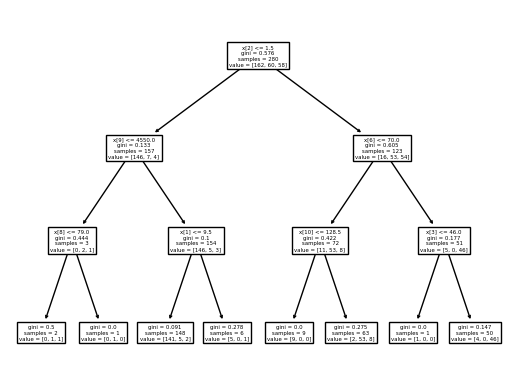

In [21]:
tree.plot_tree(clf_tree)

# Random forests

In [22]:
clf = RandomForestClassifier(
    max_depth=4, 
    random_state=0, 
    n_estimators=200)

In [23]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=200, random_state=0)

In [24]:
clf.score(X_train, y_train), clf.score(X_test, y_test)

(0.9321428571428572, 0.8936170212765957)

In [25]:
for name, score in zip(X_col, clf.feature_importances_):
    print(name, score)

Gender 0.007982908501810769
Age 0.13294313476709496
Occupation 0.17989153250148518
Sleep Duration 0.07367327151868415
Quality of Sleep 0.07063061739448524
Physical Activity Level 0.02682446944821355
Stress Level 0.06458440448846094
BMI Category 0.04015099545174018
Heart Rate 0.03519037597736181
Daily Steps 0.04565581662351279
SYS 0.15764682620831488
DIA 0.16482564711883552


# Gradient Boosting

In [29]:
gb_clf = GradientBoostingRegressor(max_depth=4, n_estimators=300, learning_rate=0.2)

In [30]:
gb_clf.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.2, max_depth=4, n_estimators=300)

In [32]:
gb_clf.score(X_train, y_train), gb_clf.score(X_test, y_test)

(0.8442101377095756, 0.6454827275015882)

In [34]:
for name, score in zip(X_col, gb_clf.feature_importances_):
    print(name, score)

Gender 7.09500324725831e-05
Age 0.0889848562367589
Occupation 0.13949256568164814
Sleep Duration 0.013946576517626092
Quality of Sleep 0.024462874518925107
Physical Activity Level 0.0005739774550415414
Stress Level 0.00037306628105251717
BMI Category 0.0017584303630963978
Heart Rate 0.008051055642245085
Daily Steps 0.002870105949660689
SYS 0.06485170031455463
DIA 0.6545638410069182


In [40]:
gb_clf.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.2,
 'loss': 'squared_error',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [41]:
gb_clf.estimators_

array([[DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
                              random_state=RandomState(MT19937) at 0x7EFE48183540)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
                              random_state=RandomState(MT19937) at 0x7EFE48183540)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
                              random_state=RandomState(MT19937) at 0x7EFE48183540)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
                              random_state=RandomState(MT19937) at 0x7EFE48183540)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
                              random_state=RandomState(MT19937) at 0x7EFE48183540)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
                              random_state=RandomState(MT19937) at 0x7EFE48183540)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
       